In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
BASE_PATH = r"C:\Users\Manaswini\Downloads\data"
SAVE_PATH = r"C:\Users\Manaswini\Downloads\anomaly\result_mset"


In [10]:
SAVE_PATH = r"C:\Users\Manaswini\Downloads\anomaly\result_isolation_forest"
os.makedirs(SAVE_PATH, exist_ok=True)

In [11]:
FEATURES = [
    "Accelerometer1RMS",
    "Accelerometer2RMS",
    "Current",
    "Pressure",
    "Temperature",
    "Thermocouple",
    "Voltage",
    "Volume Flow RateRMS"
]

In [13]:
anomaly_free_path = os.path.join(
    BASE_PATH, "anomaly-free", "anomaly-free.csv"
)

df_normal = pd.read_csv(anomaly_free_path, sep=";")
df_normal["datetime"] = pd.to_datetime(df_normal["datetime"])
df_normal.set_index("datetime", inplace=True)

df_normal = df_normal[FEATURES]

print(df_normal.shape)
df_normal.head()

(9405, 8)


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS
datetime,,,,,,,,
2020-02-08 13:30:47,0.202394,0.275154,2.16975,0.382638,90.6454,26.8508,238.852,122.664
2020-02-08 13:30:48,0.203153,0.277857,2.07999,-0.273216,90.7978,26.8639,227.943,122.338
2020-02-08 13:30:50,0.202054,0.275790,2.52577,0.382638,90.7730,26.8603,223.486,121.338
2020-02-08 13:30:51,0.203595,0.278101,2.49742,0.054711,90.8424,26.8616,244.904,121.664
2020-02-08 13:30:52,0.201889,0.276363,2.29194,0.710565,90.6664,26.8603,239.196,122.000


In [14]:
scaler = StandardScaler()
scaled_normal = scaler.fit_transform(df_normal)

iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.01,  
    random_state=42
)
iso_forest.fit(scaled_normal)

,n_estimators,100
,max_samples,'auto'
,contamination,0.01
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

ANOMALY_FREE_PATH = os.path.join(BASE_PATH, "anomaly-free", "anomaly-free.csv")

VALVE1_PATH = os.path.join(BASE_PATH, "Valve1")
VALVE2_PATH = os.path.join(BASE_PATH, "Valve2")
OTHER_PATH  = os.path.join(BASE_PATH, "Other")

In [17]:
metrics_df = pd.DataFrame(columns=["Folder", "File", "Anomaly_Ratio"])

folder = "Valve1"
num_files = 16
folder_path = os.path.join(BASE_PATH, folder)

for i in range(num_files):
    file_path = os.path.join(folder_path, f"{i}.csv")
    fault_df = pd.read_csv(file_path, sep=";")
    fault_df["datetime"] = pd.to_datetime(fault_df["datetime"])
    fault_df.set_index("datetime", inplace=True)
    fault_df = fault_df[FEATURES]

    fault_scaled = scaler.transform(fault_df)

    preds = iso_forest.predict(fault_scaled)
    anomaly_ratio = (preds == -1).mean()

    metrics_df = pd.concat([metrics_df, pd.DataFrame([{
        "Folder": folder,
        "File": f"{i}.csv",
        "Anomaly_Ratio": anomaly_ratio
    }])], ignore_index=True)

    print(f"{folder} file {i}.csv | Anomaly ratio: {anomaly_ratio:.3f}")


C:\Users\Manaswini\AppData\Local\Temp\ipykernel_30476\650972744.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, pd.DataFrame([{


Valve1 file 0.csv | Anomaly ratio: 1.000
Valve1 file 1.csv | Anomaly ratio: 1.000
Valve1 file 2.csv | Anomaly ratio: 1.000
Valve1 file 3.csv | Anomaly ratio: 1.000
Valve1 file 4.csv | Anomaly ratio: 1.000
Valve1 file 5.csv | Anomaly ratio: 1.000
Valve1 file 6.csv | Anomaly ratio: 1.000
Valve1 file 7.csv | Anomaly ratio: 1.000
Valve1 file 8.csv | Anomaly ratio: 1.000
Valve1 file 9.csv | Anomaly ratio: 1.000
Valve1 file 10.csv | Anomaly ratio: 1.000
Valve1 file 11.csv | Anomaly ratio: 1.000
Valve1 file 12.csv | Anomaly ratio: 1.000
Valve1 file 13.csv | Anomaly ratio: 1.000
Valve1 file 14.csv | Anomaly ratio: 1.000
Valve1 file 15.csv | Anomaly ratio: 1.000


In [18]:
fault_folders = {
    "Valve2": 4,
    "Other": 14  # files 1 to 14
}

for folder, num_files in fault_folders.items():
    folder_path = os.path.join(BASE_PATH, folder)
    
    start_idx = 1 if folder == "Other" else 0
    
    for i in range(start_idx, start_idx + num_files):
        file_path = os.path.join(folder_path, f"{i}.csv")
        fault_df = pd.read_csv(file_path, sep=";")
        fault_df["datetime"] = pd.to_datetime(fault_df["datetime"])
        fault_df.set_index("datetime", inplace=True)
        fault_df = fault_df[FEATURES]

        fault_scaled = scaler.transform(fault_df)

        preds = iso_forest.predict(fault_scaled)
        anomaly_ratio = (preds == -1).mean()

        metrics_df = pd.concat([metrics_df, pd.DataFrame([{
            "Folder": folder,
            "File": f"{i}.csv",
            "Anomaly_Ratio": anomaly_ratio
        }])], ignore_index=True)

        print(f"{folder} file {i}.csv | Anomaly ratio: {anomaly_ratio:.3f}")

Valve2 file 0.csv | Anomaly ratio: 1.000
Valve2 file 1.csv | Anomaly ratio: 1.000
Valve2 file 2.csv | Anomaly ratio: 1.000
Valve2 file 3.csv | Anomaly ratio: 1.000
Other file 1.csv | Anomaly ratio: 1.000
Other file 2.csv | Anomaly ratio: 1.000
Other file 3.csv | Anomaly ratio: 1.000
Other file 4.csv | Anomaly ratio: 1.000
Other file 5.csv | Anomaly ratio: 0.126
Other file 6.csv | Anomaly ratio: 0.164
Other file 7.csv | Anomaly ratio: 0.222
Other file 8.csv | Anomaly ratio: 0.053
Other file 9.csv | Anomaly ratio: 0.465
Other file 10.csv | Anomaly ratio: 0.653
Other file 11.csv | Anomaly ratio: 0.947
Other file 12.csv | Anomaly ratio: 0.881
Other file 13.csv | Anomaly ratio: 0.794
Other file 14.csv | Anomaly ratio: 0.696


            mean       min  max
Folder                         
Other   0.642936  0.053182  1.0
Valve1  1.000000  1.000000  1.0
Valve2  1.000000  1.000000  1.0


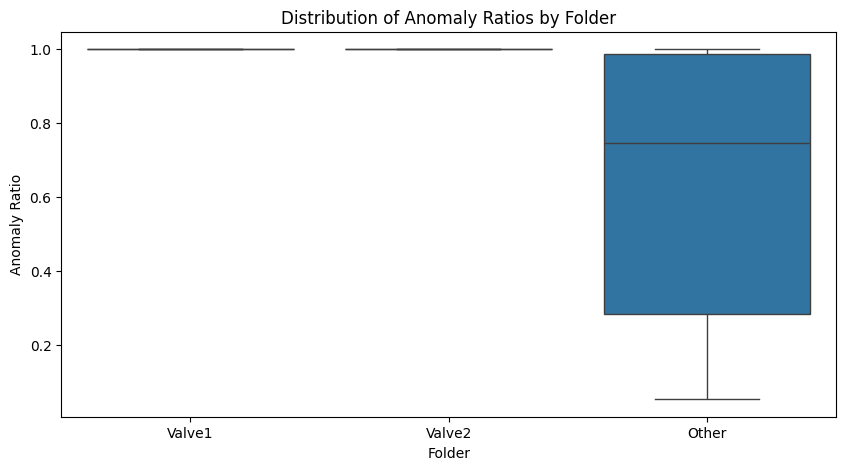

In [20]:
summary = metrics_df.groupby("Folder")["Anomaly_Ratio"].agg(["mean", "min", "max"])
print(summary)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(data=metrics_df, x="Folder", y="Anomaly_Ratio")
plt.title("Distribution of Anomaly Ratios by Folder")
plt.ylabel("Anomaly Ratio")
plt.show()

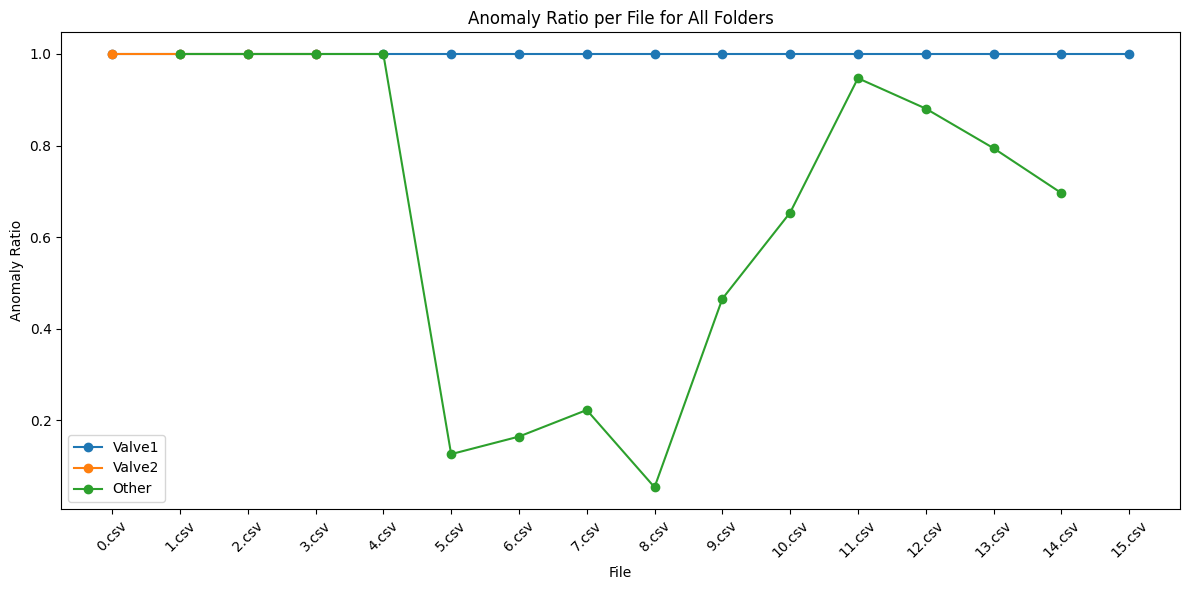

In [21]:
plt.figure(figsize=(12,6))
for folder in metrics_df["Folder"].unique():
    folder_data = metrics_df[metrics_df["Folder"]==folder]
    plt.plot(folder_data["File"], folder_data["Anomaly_Ratio"], marker='o', label=folder)

plt.xticks(rotation=45)
plt.xlabel("File")
plt.ylabel("Anomaly Ratio")
plt.title("Anomaly Ratio per File for All Folders")
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
scaler = StandardScaler()
scaled_normal = scaler.fit_transform(df_normal)

iso_forest = IsolationForest(
    n_estimators=200,        
    max_samples='auto',
    contamination=0.02,      
    max_features=0.9,        
    random_state=42,
    verbose=1
)
iso_forest.fit(scaled_normal)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


,n_estimators,200
,max_samples,'auto'
,contamination,0.02
,max_features,0.9
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,1
,warm_start,False


In [23]:
fault_folders = {
    "Valve1": 16,
    "Valve2": 4,
    "Other": 14  
}

metrics_df = pd.DataFrame(columns=["Folder", "File", "Anomaly_Ratio"])

for folder, num_files in fault_folders.items():
    folder_path = os.path.join(BASE_PATH, folder)
    
    for i in range(num_files):
        file_index = i if folder != "Other" else i+1
        file_path = os.path.join(folder_path, f"{file_index}.csv")
        
        fault_df = pd.read_csv(file_path, sep=";")
        fault_df["datetime"] = pd.to_datetime(fault_df["datetime"])
        fault_df.set_index("datetime", inplace=True)
        fault_df = fault_df[FEATURES]
        fault_scaled = scaler.transform(fault_df)
        
        preds = iso_forest.predict(fault_scaled)
        anomaly_ratio = (preds == -1).mean()
        
        metrics_df = pd.concat([
            metrics_df,
            pd.DataFrame([{
                "Folder": folder,
                "File": f"{file_index}.csv",
                "Anomaly_Ratio": anomaly_ratio
            }])
        ], ignore_index=True)
        
        print(f"{folder} file {file_index}.csv | Anomaly ratio: {anomaly_ratio:.3f}")

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
C:\Users\Manaswini\AppData\Local\Temp\ipykernel_30476\831506893.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 t

Valve1 file 0.csv | Anomaly ratio: 1.000
Valve1 file 1.csv | Anomaly ratio: 1.000
Valve1 file 2.csv | Anomaly ratio: 1.000
Valve1 file 3.csv | Anomaly ratio: 1.000
Valve1 file 4.csv | Anomaly ratio: 1.000
Valve1 file 5.csv | Anomaly ratio: 1.000
Valve1 file 6.csv | Anomaly ratio: 1.000


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks    

Valve1 file 7.csv | Anomaly ratio: 1.000
Valve1 file 8.csv | Anomaly ratio: 1.000
Valve1 file 9.csv | Anomaly ratio: 1.000
Valve1 file 10.csv | Anomaly ratio: 1.000
Valve1 file 11.csv | Anomaly ratio: 1.000
Valve1 file 12.csv | Anomaly ratio: 1.000
Valve1 file 13.csv | Anomaly ratio: 1.000
Valve1 file 14.csv | Anomaly ratio: 1.000


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks    

Valve1 file 15.csv | Anomaly ratio: 1.000
Valve2 file 0.csv | Anomaly ratio: 1.000
Valve2 file 1.csv | Anomaly ratio: 1.000
Valve2 file 2.csv | Anomaly ratio: 1.000
Valve2 file 3.csv | Anomaly ratio: 1.000
Other file 1.csv | Anomaly ratio: 1.000
Other file 2.csv | Anomaly ratio: 1.000
Other file 3.csv | Anomaly ratio: 1.000


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks    

Other file 4.csv | Anomaly ratio: 1.000
Other file 5.csv | Anomaly ratio: 0.317
Other file 6.csv | Anomaly ratio: 0.337
Other file 7.csv | Anomaly ratio: 0.440
Other file 8.csv | Anomaly ratio: 0.259
Other file 9.csv | Anomaly ratio: 0.875


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks    

Other file 10.csv | Anomaly ratio: 0.964
Other file 11.csv | Anomaly ratio: 1.000
Other file 12.csv | Anomaly ratio: 1.000
Other file 13.csv | Anomaly ratio: 1.000
Other file 14.csv | Anomaly ratio: 1.000


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


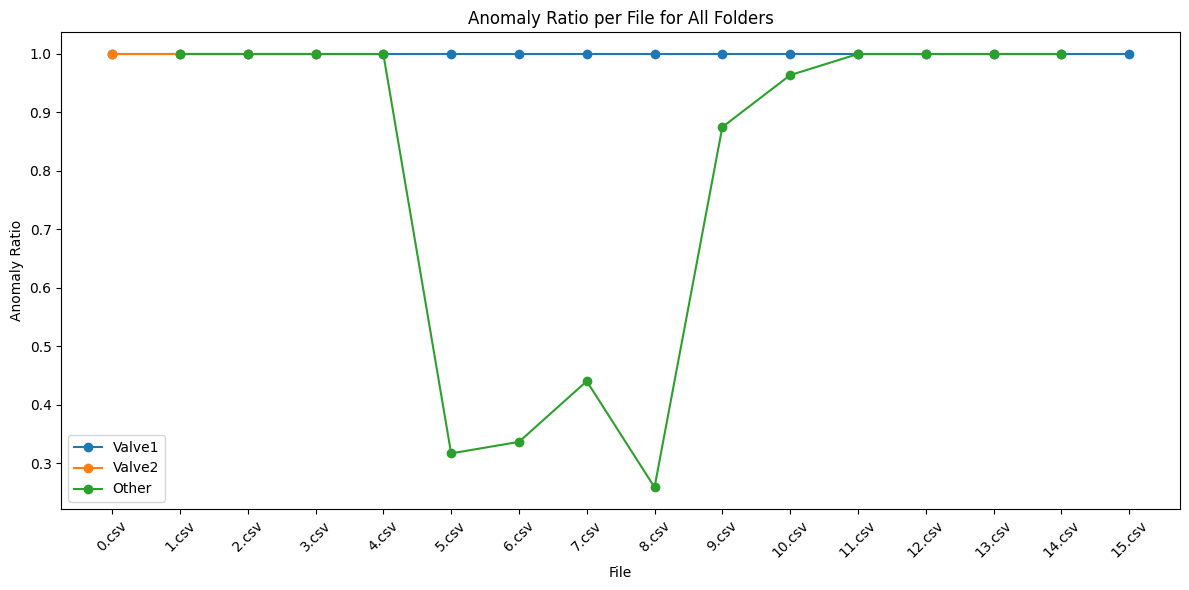

In [24]:
plt.figure(figsize=(12,6))
for folder in metrics_df["Folder"].unique():
    folder_data = metrics_df[metrics_df["Folder"]==folder]
    plt.plot(folder_data["File"], folder_data["Anomaly_Ratio"], marker='o', label=folder)

plt.xticks(rotation=45)
plt.xlabel("File")
plt.ylabel("Anomaly Ratio")
plt.title("Anomaly Ratio per File for All Folders")
plt.legend()
plt.tight_layout()
plt.show()

            mean       min  max
Folder                         
Other   0.799396  0.258936  1.0
Valve1  1.000000  1.000000  1.0
Valve2  1.000000  1.000000  1.0


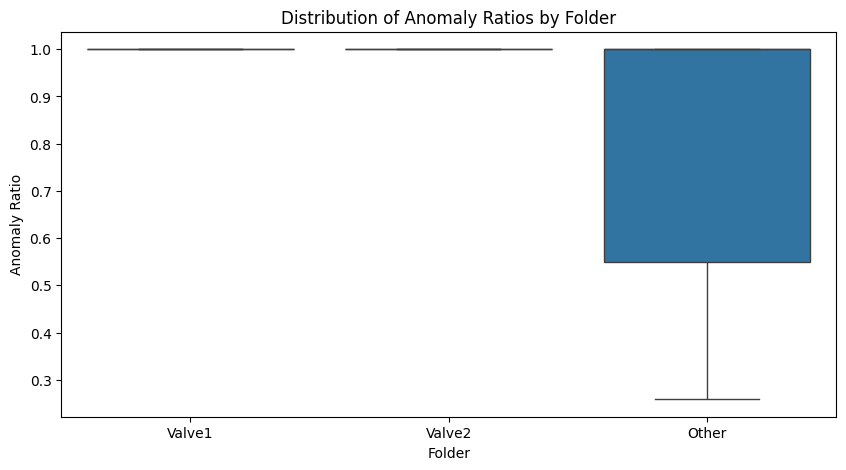

In [25]:
summary = metrics_df.groupby("Folder")["Anomaly_Ratio"].agg(["mean", "min", "max"])
print(summary)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(data=metrics_df, x="Folder", y="Anomaly_Ratio")
plt.title("Distribution of Anomaly Ratios by Folder")
plt.ylabel("Anomaly Ratio")
plt.show()

In [26]:
import joblib

metrics_df.to_csv(os.path.join(SAVE_PATH, "isolation_forest_metrics.csv"), index=False)
joblib.dump({
    "scaler": scaler,
    "model": iso_forest,
    "features": FEATURES
}, os.path.join(SAVE_PATH, "isolation_forest_pipeline.pkl"))

['C:\\Users\\Manaswini\\Downloads\\anomaly\\result_isolation_forest\\isolation_forest_pipeline.pkl']